(441, 290)
223


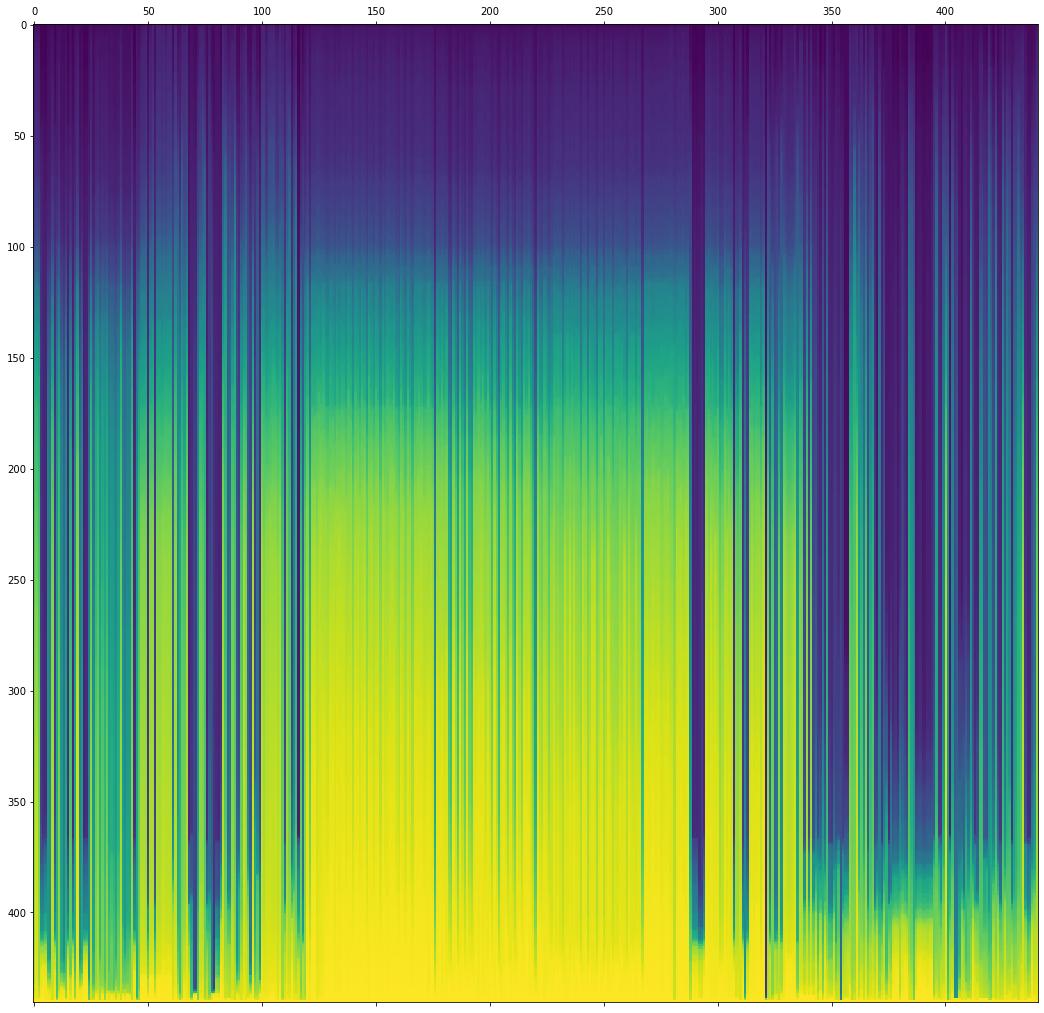

In [1]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np

nutrients_matrix = genfromtxt('raw_food_nutrients.csv', delimiter=',')

print(nutrients_matrix.shape)

print(np.linalg.matrix_rank(nutrients_matrix))

food_corr = np.corrcoef(nutrients_matrix)

food_corr.sort(axis = 0)
#food_corr.sort(axis=0)

fig, ax = plt.subplots(figsize=(18, 18))
ax.matshow(food_corr, interpolation='nearest', aspect='auto')

In [64]:
import pandas as pd

def read_spreadsheet(SHEET_ID, SHEET_NAME):
    url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
    data = pd.read_csv(url, encoding='utf-8', low_memory=False)
    return data

SHEET_ID = '1tzksfTXjQiBT6aa4vPTAMja5uQocW5lSH7R1izsuMUs'
food_nutrients_data = read_spreadsheet(SHEET_ID, 'All%20solids%20and%20liquids%20per%20100g')
nutrients_daily_need = read_spreadsheet(SHEET_ID, 'Nutrients%20Needs')

const = 3


In [65]:
nutrients_daily_need

,Version id,"Energy with dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),"Fat, total \n(g)",Total dietary fibre \n(g),Total sugars (g),Added sugars (g),Free sugars \n(g),Calcium (Ca) \n(mg),...,Riboflavin (B2) \n(mg),Pantothenic acid (B5) \n(mg),Pyridoxine (B6) \n(mg),Biotin (B7) \n(ug),Cobalamin (B12) \n(ug),Total folates \n(ug),Vitamin C \n(mg),Vitamin D3 equivalents \n(ug),Vitamin E \n(mg),Dietary Fats \n(g)
0,1,11000,2300,64,50,30,25,0,0,1000,...,1.3,6,1.3,30,2.4,8000,45,5,10,13


In [66]:
food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= const]

,q,Classification,Food Name,Назва їжі. Переклад,Моя класифікація,Особисті вподобання,Сира,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),...,Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg),Dietary Fats \n(g),Saturated and trans fats\n(g)
43,F009527,"11,701","Water, tap",Водопровідний кран,Other,4,0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
59,F001919,"12,101","Buckwheat groats, uncooked",Крупа гречана неварена,Grain food,4,1,1360.0,1320.0,14.9,...,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0.0,2.05,0.00
66,F005692,"12,101","Millet, uncooked","Пшоно, неварене",Grain food,4,1,1480.0,1450.0,11.7,...,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,2.54,0.00
75,F007684,"12,101","Rice, wild, uncooked","Рис, дикий, сирий",Grain food,4,1,1510.0,1460.0,7.8,...,0.0,0.0,0.0,0.0,0.0,0.0,179.0,0.0,0.78,0.00
107,F008222,"12,103","Semolina, uncooked",Манна крупа сира,Grain food,3,1,1300.0,1270.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,136.0,0.0,0.63,0.01
143,F001621,"12,204","Bread, mixed grain","Хліб, зерновий",Grain food,4,0,1080.0,1020.0,37.6,...,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,3.44,0.16
355,F000402,"15,101","Bassa, fillet, raw","Баса, філе, сире",Meat,4,1,332.0,332.0,83.2,...,0.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.70,0.11
373,F005268,"15,101","Mackerel, raw","Скумбрія, сира",Meat,3,1,561.0,561.0,71.7,...,0.0,0.0,0.0,0.0,0.0,0.0,216.0,0.0,3.63,0.00
399,F008263,"15,101","Silver perch, aquacultured, raw","Окунь сріблястий, аквакультурний, сирий",Meat,3,1,924.0,924.0,61.8,...,0.0,0.0,0.0,0.0,0.0,0.0,215.0,0.0,9.80,0.56
471,F000105,"16,101","Apple, pink lady, unpeeled, raw","Яблуко, рожеве, неочищене, сире",Fruit,4,1,242.0,218.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00


In [67]:
main_nutrient_columns = nutrients_daily_need.columns.tolist()
main_nutrient_columns.pop(0)
main_nutrient_columns.pop(0)
print(main_nutrient_columns)

['Moisture (water) \n(g)', 'Protein \n(g)', 'Fat, total \n(g)', 'Total dietary fibre \n(g)', 'Total sugars (g)', 'Added sugars (g)', 'Free sugars \n(g)', 'Calcium (Ca) \n(mg)', 'Copper (Cu) \n(mg)', 'Fluoride (F) \n(ug)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Manganese (Mn) \n(mg)', 'Molybdenum (Mo) \n(ug)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Zinc (Zn) \n(mg)', 'Vitamin A retinol equivalents \n(ug)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Pantothenic acid (B5) \n(mg)', 'Pyridoxine (B6) \n(mg)', 'Biotin (B7) \n(ug)', 'Cobalamin (B12) \n(ug)', 'Total folates \n(ug)', 'Vitamin C \n(mg)', 'Vitamin D3 equivalents \n(ug)', 'Vitamin E \n(mg)', 'Dietary Fats \n(g)']


In [68]:
import numpy as np

nutrients_daily_need_vector = nutrients_daily_need[main_nutrient_columns].to_numpy(dtype = np.longdouble)
print(nutrients_daily_need_vector.shape)
nutrients_daily_need_vector

(1, 32)


array([[2.3e+03, 6.4e+01, 5.0e+01, 3.0e+01, 2.5e+01, 0.0e+00, 0.0e+00,
        1.0e+03, 1.7e+00, 4.0e+03, 1.5e+02, 8.0e+00, 4.0e+02, 5.5e+00,
        4.5e+01, 1.0e+03, 3.8e+03, 7.0e+01, 5.0e+02, 1.4e+01, 9.0e+02,
        1.2e+00, 1.3e+00, 6.0e+00, 1.3e+00, 3.0e+01, 2.4e+00, 8.0e+03,
        4.5e+01, 5.0e+00, 1.0e+01, 1.3e+01]], dtype=float128)

In [69]:
import numpy as np

food_nutrients_data_matrix = food_nutrients_data[main_nutrient_columns].loc[food_nutrients_data['Особисті вподобання'] >= const].to_numpy(dtype=np.longdouble)
print(food_nutrients_data_matrix.shape)


(39, 32)


In [70]:
import scipy.linalg

food_nutrients_inverse_matrix = scipy.linalg.pinv(food_nutrients_data_matrix)
print(food_nutrients_inverse_matrix.shape)

(32, 39)


In [71]:
np.matmul(nutrients_daily_need_vector, food_nutrients_inverse_matrix)

array([[  4.64952611,   1.49193833,   5.41081972,  -4.22826577,
          4.51665394,  -2.97312423,  -3.68566228,   2.50863304,
         -1.26096575,  54.42376595,  31.90213891,   1.85164574,
        -25.42271801, -14.67902474,  -6.35673465, -10.11443114,
        -11.01896085,  -8.60559984,  -3.12477827,   4.01401519,
        -30.9926024 , -30.22867796,   0.2348944 ,   2.3067557 ,
         15.84793407,  -4.71353012,  -1.3445303 ,  18.96788838,
          6.08850615,  -0.49857156,  27.08189759,  10.36762128,
        -26.29075533, -26.15990546,  18.27934396,   9.12377899,
          1.18994655,  -3.4894101 ,  20.37164564]], dtype=float128)

тут проблема така.. що ми отримуємо від'ємні розвязки.. тішить що це наразі хочаб якийсь розвязок.
Вручну підбирати теж складно і навіть з найменшою кількістю елементів так просто роз'язати наразі не вийде.Треба спробувати знайти розв'язок використовуючи лінійне програмування. Отже пробуємо всяку всячину..

In [72]:
import numpy as np
try:
    np.linalg.lstsq(food_nutrients_inverse_matrix, nutrients_daily_need_vector, 10)
except:
    print("error")

error


Сціпай пропонує пакет мінімізації із в'язями.

In [73]:
import scipy.optimize as opt
import numpy as np


def find_solution(m):
    norm = nutrients_daily_need_vector
    norm[norm == 0] = 1.
    res = opt.minimize(
    fun = lambda food_daily_need_vector : 
        np.linalg.norm(
            (np.matmul(food_daily_need_vector, food_nutrients_data_matrix)
            - nutrients_daily_need_vector) / norm), 
    x0 = np.ones((food_nutrients_data_matrix.shape[0], 1)), 
    method = m,
    bounds = [(0, np.Inf) for i in range(food_nutrients_data_matrix.shape[0])],
    options = {'maxiter':1e8, 'maxfun': 1e7} )
        
    return res
    
res = {}
res['Nelder-Mead'] = find_solution('Nelder-Mead')
res['L-BFGS-B'] = find_solution('L-BFGS-B')
res['TNC'] = find_solution('TNC')
res['SLSQP'] = find_solution('SLSQP')
res['Powell'] = find_solution('Powell')

print(res)



/tmp/ipykernel_5474/2673220537.py:8: OptimizeWarning: Unknown solver options: maxfun
  res = opt.minimize(


{'Nelder-Mead':  final_simplex: (array([[1.61740458e+01, 1.23153683e-06, 5.49367746e-01, ...,
        5.49681338e-08, 1.68433339e-01, 1.23401667e-07],
       [1.61741237e+01, 1.33659034e-06, 5.49377443e-01, ...,
        7.48356403e-08, 1.68432812e-01, 1.15859344e-07],
       [1.61740178e+01, 8.99253248e-07, 5.49378381e-01, ...,
        7.37178933e-08, 1.68424334e-01, 1.17078165e-07],
       ...,
       [1.61740051e+01, 9.82678250e-07, 5.49390637e-01, ...,
        1.11741753e-08, 1.68436700e-01, 1.04937566e-07],
       [1.61741166e+01, 1.66231369e-06, 5.49375677e-01, ...,
        9.16208685e-08, 1.68429557e-01, 1.07110140e-07],
       [1.61741340e+01, 8.85692576e-07, 5.49372493e-01, ...,
        7.39251738e-08, 1.68438528e-01, 1.11601065e-07]]), array([2.29182806, 2.29182806, 2.29182806, 2.29182806, 2.29182806,
       2.29182806, 2.29182806, 2.29182806, 2.29182806, 2.29182806,
       2.29182806, 2.29182806, 2.29182806, 2.29182806, 2.29182806,
       2.29182806, 2.29182806, 2.29182806, 2

In [76]:
print(res['Powell']['fun'])
print(res['SLSQP']['fun'])
print(res['L-BFGS-B']['fun'])
print(res['TNC']['fun'])
print(res['Nelder-Mead']['fun'])
print(res['Powell']['x'])
print(res['SLSQP']['x'])
print(res['L-BFGS-B']['x'])
print(res['TNC']['x'])
print(res['Nelder-Mead']['x'])

2.3034603807140683264
2.2918345896178678191
2.2924704455513025443
2.2918275755207691145
2.291828057582257
[1.65213861e+01 3.71331628e-01 4.86516093e-01 4.49564724e-01
 1.19345552e+00 6.98883512e-01 5.33390859e-05 1.54935470e-02
 3.33780723e-01 3.40879970e-05 3.69580031e-05 7.90578779e-01
 3.81635736e-05 2.57104193e-02 5.50466244e-05 4.44616654e-05
 1.26858741e-10 4.08262164e-05 4.15954132e-05 4.13913513e-05
 3.80234911e-05 3.67340159e-05 5.97764774e-05 9.46699512e-01
 4.02758241e+00 5.28956821e-05 3.70825404e-01 3.65379997e-05
 5.31857405e-05 3.41570729e-06 8.34280954e-01 5.85061526e-05
 5.25825407e-05 4.40981745e-05 4.93267465e-05 1.21255432e-01
 4.60116445e-05 1.73469307e-01 6.58566444e-05]
[1.61793833e+01 0.00000000e+00 5.46112869e-01 6.39081753e-01
 1.52319493e+00 7.19547444e-01 0.00000000e+00 0.00000000e+00
 3.58143032e-01 0.00000000e+00 6.44598655e-17 2.39064851e-02
 6.30299982e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.40042380e-16 1.42325659e-18 0.00000000e+00 0.000000

TNC дає хороші результати із великою кількістю нульових елементів. Тобто за відносно точний результат при мінімумі продуктів. Глянемо на це детальніше.

In [87]:
df = food_nutrients_data.loc[food_nutrients_data['Особисті вподобання'] >= const]
df = df.drop(columns=['Classification', 'q', 'Food Name', 'Моя класифікація','Особисті вподобання', 'Сира'])
df.insert(1, 'Кількість Powell (100 грам)', res['Powell']['x'])
df.insert(2, 'Кількість SLSQP (100 грам)', res['SLSQP']['x'])
df.insert(3, 'Кількість L-BFGS-B (100 грам)', res['L-BFGS-B']['x'])
df.insert(4, 'Кількість TNC (100 грам)', res['TNC']['x'])
df.insert(5, 'Кількість Nelder-Mead (100 грам)', res['Nelder-Mead']['x'])
df

,Назва їжі. Переклад,Кількість Powell (100 грам),Кількість SLSQP (100 грам),Кількість L-BFGS-B (100 грам),Кількість TNC (100 грам),Кількість Nelder-Mead (100 грам),"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),...,Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg),Dietary Fats \n(g),Saturated and trans fats\n(g)
43,Водопровідний кран,1.652139e+01,1.617938e+01,16.387080,16.177753,1.617405e+01,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
59,Крупа гречана неварена,3.713316e-01,0.000000e+00,0.018843,0.000000,1.231537e-06,1360.0,1320.0,14.9,12.8,...,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0.0,2.05,0.00
66,"Пшоно, неварене",4.865161e-01,5.461129e-01,0.543616,0.550085,5.493677e-01,1480.0,1450.0,11.7,10.2,...,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,2.54,0.00
75,"Рис, дикий, сирий",4.495647e-01,6.390818e-01,0.634708,0.636021,6.355686e-01,1510.0,1460.0,7.8,14.7,...,0.0,0.0,0.0,0.0,0.0,0.0,179.0,0.0,0.78,0.00
107,Манна крупа сира,1.193456e+00,1.523195e+00,1.501849,1.508517,1.509346e+00,1300.0,1270.0,14.0,10.7,...,0.0,0.0,0.0,0.0,0.0,0.0,136.0,0.0,0.63,0.01
143,"Хліб, зерновий",6.988835e-01,7.195474e-01,0.689747,0.720218,7.205525e-01,1080.0,1020.0,37.6,10.7,...,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,3.44,0.16
355,"Баса, філе, сире",5.333909e-05,0.000000e+00,0.000000,0.000000,2.660324e-08,332.0,332.0,83.2,15.7,...,0.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.70,0.11
373,"Скумбрія, сира",1.549355e-02,0.000000e+00,0.000000,0.000000,1.133949e-07,561.0,561.0,71.7,19.3,...,0.0,0.0,0.0,0.0,0.0,0.0,216.0,0.0,3.63,0.00
399,"Окунь сріблястий, аквакультурний, сирий",3.337807e-01,3.581430e-01,0.359449,0.357609,3.574596e-01,924.0,924.0,61.8,19.5,...,0.0,0.0,0.0,0.0,0.0,0.0,215.0,0.0,9.80,0.56
471,"Яблуко, рожеве, неочищене, сире",3.408800e-05,0.000000e+00,0.000000,0.000000,4.337381e-07,242.0,218.0,84.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00


In [ ]:
Для першої версії меню візьмемо L-BFGS-B алгоритм.
Вертаємося до спреадшиту в гугл. Але спочатку обрахуємо компоненти і ваги.

In [94]:
"|".join(df.loc[df['Кількість L-BFGS-B (100 грам)'] > 1e-5]['Назва їжі. Переклад'].to_list())

"Водопровідний кран|Крупа гречана неварена|Пшоно, неварене|Рис, дикий, сирий|Манна крупа сира|Хліб, зерновий|Окунь сріблястий, аквакультурний, сирий|Ожина, сира|Абрикос сирий|Курка, грудка, нежирна м'якоть, сире|Молоко коров'яче рідке звичайної жирності, 3,5% жирності|Морква зріла, очищена, свіжа, сира|Помідор, рома, сирий|Гарбуз масляний очищений свіжий сира|Огірок звичайний неочищений сирий|Часник, очищений, свіжий, сирий"

In [100]:
x = res['L-BFGS-B']['x']
x = x[x > 1e-5]
tot = sum(x)
"|".join(map(str, 4.6808510638297875*x / tot))

'2.723992196569482|0.003132243391568606|0.0903642824770884|0.10550625271670556|0.24964936893023876|0.11465524488585162|0.059750488670056785|0.02069971249432299|0.0002953069900891797|0.14985643259529308|0.6528248941824107|0.05321055043334722|0.3597316917746287|0.037990989946184904|0.031178721052596066|0.028012686719923376'

In [98]:
11000/235

46.808510638297875

In [101]:
tot

28.15921405641909